In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [4]:
df = pd.read_csv('../titanic_data/processed_data.csv')
df.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title,relatives,not_alone
0,0,1,1,1,4,0,0,4,0,2,0,1
1,1,1,1,0,0,1,2,4,0,4,3,0
2,2,1,0,1,0,1,2,4,0,2,3,0
3,3,1,0,0,4,1,2,4,0,1,3,0
4,4,1,0,1,3,1,2,4,0,3,3,0


In [5]:
X = df.drop('survived',axis=1)
y = df['survived']

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)


[0.3636799  0.06446274 0.18006853 0.09198543 0.02347577 0.01899987
 0.06540973 0.0344167  0.11409238 0.02994232 0.01346664]


In [7]:
#  Set features on the basis of importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
X = df[feat_importances.index]
Y = df['survived']

In [8]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 21, Train/Test Score: 0.815/0.823
k: 23, Train/Test Score: 0.817/0.823
k: 25, Train/Test Score: 0.822/0.820
k: 27, Train/Test Score: 0.819/0.817
k: 29, Train/Test Score: 0.821/0.820
k: 31, Train/Test Score: 0.813/0.820
k: 33, Train/Test Score: 0.809/0.820
k: 35, Train/Test Score: 0.811/0.820
k: 37, Train/Test Score: 0.812/0.817
k: 39, Train/Test Score: 0.814/0.817
k: 41, Train/Test Score: 0.817/0.811


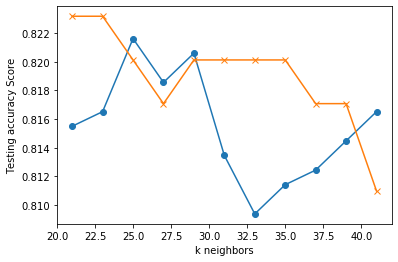

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

#The optimal K value usually found is the square root of N, where N is the total number of samples.

from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(21, 43, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(21, 43, 2), train_scores, marker='o')
plt.plot(range(21, 43, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Model Accuracy
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train_scaled, y_train)
print('k=39 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=39 Test Acc: 0.817
